In [1]:
import glob
import numpy as np
import pandas as pd
import plotly as py
import cufflinks as cf
%matplotlib inline

In [2]:
train_A_over_logs = "../eval/20190317_RetinaNet_train_A_over_eval/test_night"
train_B_over_logs = "../eval/20190317_RetinaNet_train_B_over_eval/test_night"
train_C_over_logs = "../eval/20190317_RetinaNet_train_C_over_eval/test_night"
train_A_over_ganaug_025_logs = "../eval/20190324_RetinaNet_train_A_over_ganaug_025_eval/test_night"
train_A_over_ganaug_050_logs = "../eval/20190324_RetinaNet_train_A_over_ganaug_050_eval/test_night"
train_A_over_ganaug_050_augonlyasbase_logs = "../eval/20190327_RetinaNet_train_A_over_ganaug_050_augonlyasbase_eval/test_night"

train_A_over_iteration = 240000 # None = best
train_B_over_iteration = 240000 # None = best
train_C_over_iteration = 240000 # None = best
train_A_over_ganaug_025_iteration = 240000 # None = best
train_A_over_ganaug_050_iteration = 240000 # None = best
train_A_over_ganaug_050_augonlyasbase_iteration = 240000 # None = best

In [3]:
train_A_over_logs = glob.glob(train_A_over_logs + "/**/*.txt", recursive = True)
train_B_over_logs = glob.glob(train_B_over_logs + "/**/*.txt", recursive = True)
train_C_over_logs = glob.glob(train_C_over_logs + "/**/*.txt", recursive = True)

train_A_over_ganaug_025_logs = glob.glob(train_A_over_ganaug_025_logs + "/**/*.txt", recursive = True)
train_A_over_ganaug_050_logs = glob.glob(train_A_over_ganaug_050_logs + "/**/*.txt", recursive = True)
train_A_over_ganaug_050_augonlyasbase_logs = glob.glob(train_A_over_ganaug_050_augonlyasbase_logs + "/**/*.txt", recursive = True)

In [4]:
def logs2df(logs, iteration = None):
    df_iterations = pd.DataFrame()
    last_iteration = -1
    for log in logs:
        df = pd.read_csv(log)
        df = df.drop(columns = ["Unnamed: 12"])
        df["Iteration"] = last_iteration if log.split("_model_")[-1].split("_")[0] == "final" else int(log.split("_model_")[-1].split("_")[0])
        df_iterations = pd.concat([df_iterations, df], axis = 0)
        df_iterations = df_iterations.reset_index(drop = True)
        last_iteration = df["Iteration"]
    df_iterations = df_iterations.sort_values(by = ['Iteration']).reset_index(drop = True)
    if iteration is not None:
        df_iterations = df_iterations.loc[df_iterations.Iteration == iteration].drop_duplicates(["Iteration"], keep = "last").reset_index(drop = True)
    df_iterations = df_iterations.set_index("Iteration")
    return df_iterations

## Last (or other specified) iterations ##

### --> All metrics are evaluated on the selected iteration <-- ###

### train_A_over ###

In [5]:
df_train_A_over = logs2df(train_A_over_logs, train_A_over_iteration)
df_train_A_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
240000,0.217384,0.504283,0.159318,0.11377,0.311071,0.411823,0.08705,0.291557,0.326512,0.242439,0.409271,0.459699


In [6]:
df_train_A_over_best_iter_per_metric = df_train_A_over.idxmax().to_frame().T
df_train_A_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000


In [7]:
df_train_A_over_best_val_per_metric = df_train_A_over.max().to_frame().T
df_train_A_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.217384,0.504283,0.159318,0.11377,0.311071,0.411823,0.08705,0.291557,0.326512,0.242439,0.409271,0.459699


### train_B_over ###

In [8]:
df_train_B_over = logs2df(train_B_over_logs, train_B_over_iteration)
df_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
240000,0.239441,0.552492,0.173887,0.132509,0.339021,0.432102,0.091567,0.316092,0.349876,0.261464,0.443101,0.47039


In [9]:
df_train_B_over_best_iter_per_metric = df_train_B_over.idxmax().to_frame().T
df_train_B_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000


In [10]:
df_train_B_over_best_val_per_metric = df_train_B_over.max().to_frame().T
df_train_B_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.239441,0.552492,0.173887,0.132509,0.339021,0.432102,0.091567,0.316092,0.349876,0.261464,0.443101,0.47039


### train_C_over ###

In [11]:
df_train_C_over = logs2df(train_C_over_logs, train_C_over_iteration)
df_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
240000,0.241156,0.558508,0.177142,0.131712,0.343208,0.436355,0.090854,0.316472,0.350336,0.26081,0.440978,0.484002


In [12]:
df_train_C_over_best_iter_per_metric = df_train_C_over.idxmax().to_frame().T
df_train_C_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000


In [13]:
df_train_C_over_best_val_per_metric = df_train_C_over.max().to_frame().T
df_train_C_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.241156,0.558508,0.177142,0.131712,0.343208,0.436355,0.090854,0.316472,0.350336,0.26081,0.440978,0.484002


### train_A_over_ganaug_025 ###

In [14]:
df_train_A_over_ganaug_025 = logs2df(train_A_over_ganaug_025_logs, train_A_over_ganaug_025_iteration)
df_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
240000,0.206325,0.471432,0.158905,0.099911,0.302659,0.410264,0.082481,0.282578,0.316502,0.227733,0.403745,0.461439


In [15]:
df_train_A_over_ganaug_025_best_iter_per_metric = df_train_A_over_ganaug_025.idxmax().to_frame().T
df_train_A_over_ganaug_025_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000


In [16]:
df_train_A_over_ganaug_025_best_val_per_metric = df_train_A_over_ganaug_025.max().to_frame().T
df_train_A_over_ganaug_025_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.206325,0.471432,0.158905,0.099911,0.302659,0.410264,0.082481,0.282578,0.316502,0.227733,0.403745,0.461439


### train_A_over_ganaug_050 ###

In [17]:
df_train_A_over_ganaug_050 = logs2df(train_A_over_ganaug_050_logs, train_A_over_ganaug_050_iteration)
df_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
240000,0.202469,0.452334,0.159172,0.098014,0.300198,0.440411,0.082052,0.277477,0.314571,0.224554,0.405783,0.490018


In [18]:
df_train_A_over_ganaug_050_best_iter_per_metric = df_train_A_over_ganaug_050.idxmax().to_frame().T
df_train_A_over_ganaug_050_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000


In [19]:
df_train_A_over_ganaug_050_best_val_per_metric = df_train_A_over_ganaug_050.max().to_frame().T
df_train_A_over_ganaug_050_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.202469,0.452334,0.159172,0.098014,0.300198,0.440411,0.082052,0.277477,0.314571,0.224554,0.405783,0.490018


### train_A_over_ganaug_050_augonlyasbase ###

In [20]:
df_train_A_over_ganaug_050_augonlyasbase = logs2df(train_A_over_ganaug_050_augonlyasbase_logs, train_A_over_ganaug_050_augonlyasbase_iteration)
df_train_A_over_ganaug_050_augonlyasbase.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
240000,0.1904,0.449105,0.140227,0.090508,0.282014,0.3601,0.08147,0.263974,0.295101,0.212692,0.371729,0.407302


In [21]:
df_train_A_over_ganaug_050_augonlyasbase_best_iter_per_metric = df_train_A_over_ganaug_050_augonlyasbase.idxmax().to_frame().T
df_train_A_over_ganaug_050_augonlyasbase_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000


In [22]:
df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric = df_train_A_over_ganaug_050_augonlyasbase.max().to_frame().T
df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.1904,0.449105,0.140227,0.090508,0.282014,0.3601,0.08147,0.263974,0.295101,0.212692,0.371729,0.407302


## Improvements ##

### train_A_over --> train_B_over ###

In [23]:
df_train_A_over_TO_train_B_over = df_train_B_over_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_B_over["Comparison"] = "A to B"
df_train_A_over_TO_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.022057,0.048209,0.01457,0.018738,0.027949,0.020279,0.004517,0.024535,0.023364,0.019025,0.03383,0.010691,A to B


### train_A_over --> train_C_over ###

In [24]:
df_train_A_over_TO_train_C_over = df_train_C_over_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_C_over["Comparison"] = "A to C"
df_train_A_over_TO_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.023772,0.054224,0.017825,0.017942,0.032136,0.024532,0.003804,0.024915,0.023825,0.018371,0.031707,0.024303,A to C


### train_A_over --> train_A_over_ganaug_025 ###

In [25]:
df_train_A_over_TO_train_A_over_ganaug_025 = df_train_A_over_ganaug_025_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_025["Comparison"] = "A to A25"
df_train_A_over_TO_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.01106,-0.032851,-0.000412,-0.013859,-0.008413,-0.001559,-0.004569,-0.008979,-0.010009,-0.014706,-0.005526,0.00174,A to A25


### train_A_over --> train_A_over_ganaug_050 ###

In [26]:
df_train_A_over_TO_train_A_over_ganaug_050 = df_train_A_over_ganaug_050_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_050["Comparison"] = "A to A50"
df_train_A_over_TO_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.014915,-0.051949,-0.000146,-0.015757,-0.010874,0.028588,-0.004998,-0.01408,-0.011941,-0.017885,-0.003488,0.030319,A to A50


### train_A_over_ganaug_050_augonlyasbase --> train_A_over_ganaug_025 ###

In [27]:
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025 = df_train_A_over_ganaug_025_best_val_per_metric - df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025["Comparison"] = "A50aoab to A25"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.015925,0.022327,0.018678,0.009403,0.020645,0.050165,0.001011,0.018604,0.021401,0.015042,0.032016,0.054137,A50aoab to A25


### train_A_over_ganaug_050_augonlyasbase --> train_A_over_ganaug_050 ###

In [28]:
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050 = df_train_A_over_ganaug_050_best_val_per_metric - df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050["Comparison"] = "A50aoab to A50"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.01207,0.003229,0.018945,0.007505,0.018184,0.080311,0.000582,0.013503,0.01947,0.011862,0.034054,0.082716,A50aoab to A50


## Combine ##

In [29]:
df_combined = pd.concat([df_train_A_over_TO_train_B_over, df_train_A_over_TO_train_C_over, df_train_A_over_TO_train_A_over_ganaug_025, df_train_A_over_TO_train_A_over_ganaug_050, df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025, df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050], axis = 0)

In [30]:
df_combined = df_combined.set_index("Comparison")
df_combined.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Comparison,,,,,,,,,,,,
A to B,0.022057,0.048209,0.01457,0.018738,0.027949,0.020279,0.004517,0.024535,0.023364,0.019025,0.03383,0.010691


Text(0, 0.5, 'Absolute change in score')

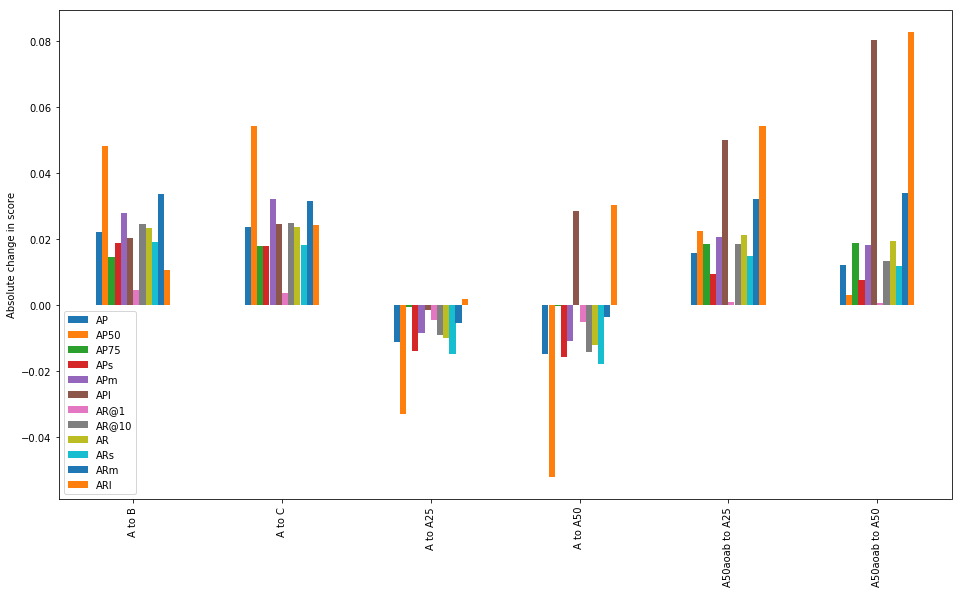

In [31]:
ax = df_combined.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Absolute change in score")

In [32]:
cf.go_offline(connected = True)
config = {
    "modeBarButtonsToRemove": ["sendDataToCloud"],
    "displaylogo": False
}
layout = {
    "title": "Impact of GAN-based augmentation",
    "yaxis": {
        "title": "Absolute change in score"
    },
    "width": 960,
    "height": 540
}
fig = df_combined.iplot(kind = "bar", y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)

In [33]:
df_combined = df_combined * 100

Text(0, 0.5, 'Absolute change in score (%)')

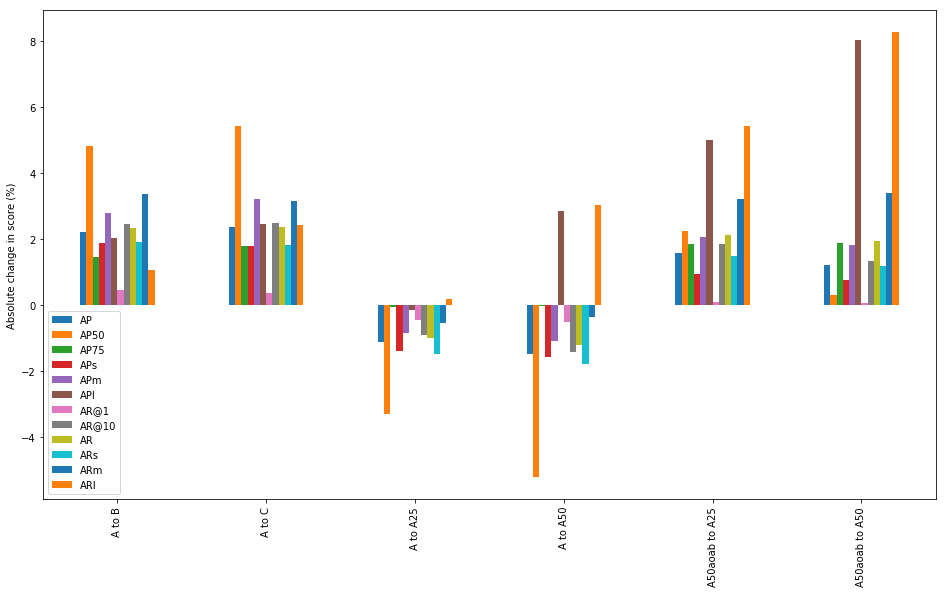

In [34]:
ax = df_combined.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Absolute change in score (%)")

In [35]:
layout = {
    "title": "Impact of GAN-based augmentation",
    "yaxis": {
        "title": "Absolute change in score (%)"
    },
    "width": 960,
    "height": 540
}
fig = df_combined.iplot(kind = "bar", y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)